# Pandas Operations on Columns<a name="_pandas operations on columns"></a>

# Table of Contents
- [ Pandas Operations on Columns](#_pandas operations on columns) 
- [ Rename a Column](#_rename a column) 
- [ Length and Unique Items in Columns](#_length and unique items in columns) 
- [ Deleting Columns](#_deleting columns) 
- [ Using the Index to Select Rows By Date](#_using the index to select rows by date) 
  - [ Matching Dates More Flexibly -- Years, Months, Ranges](#_matching dates more flexibly -- years, months, ranges) 
- [ Simple Stats on Columns of Numbers](#_simple stats on columns of numbers) 
- [ Histograms (Distribution) of Numeric Values](#_histograms distribution of numeric values)
  - [ Histogram of a Subset by Value](#_histogram of a subset by value) 
- [ Sorting By Column](#_sorting by column) 
- [ Create New Columns](#_create new columns) 
- [ Applying a Function to Each Column](#_applying a function to each column) 
  - [ Sort by the new columns to get Highest Proportion](#_sort by the new columns to get highest proportion) 


In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
complaints = pd.read_csv('data/311-service-requests.csv')

/Users/cherny/miniconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Rename a Column<a name="_rename a column"></a>

In [5]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [6]:
# Use a dictstyle struction to specify which columns you want to be named what. Save the result.
complaints = complaints.rename(index=str, columns={"Street Name": "Street", "Descriptor": "Description"})

In [7]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Description', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Na

# Length and Unique Items in Columns<a name="_length and unique items in columns"></a>

In [8]:
# How many rows are there in the data?
len(complaints)

111069

In [9]:
complaints['Description'].unique()

array(['Loud Talking', 'Commercial Overnight Parking', 'Loud Music/Party',
       'Car/Truck Horn', 'Condition Attracting Rodents',
       'Banging/Pounding', 'No Access', 'Double Parked Blocking Vehicle',
       'Engine Idling', 'Rat Sighting', 'Posted Parking Sign Violation',
       'Street Light Out', 'Car/Truck Music', 'Partial Access',
       'Bees/Wasps - Not a beekeper', 'Driver Complaint', nan,
       'Controller', 'Rodents/Insects/Garbage', 'No Receipt', 'Medicaid',
       '15 Street Cond/Dump-Out/Drop-Off', 'ELECTRIC-SUPPLY', 'BASIN/SINK',
       'HEAT', 'BELL-BUZZER/INTERCOM', 'MAIL-BOX', 'LOCKS', 'Cave-in',
       'Exchange/Refund/Return', '14 Derelict Vehicles',
       'Noise: Construction Before/After Hours (NM1)', 'In Public',
       'Chemical Vapors/Gases/Odors', 'Plate Condition - Shifted',
       'With License Plate', 'Mouse Sighting', 'Noise, Barking Dog (NR5)',
       'Lead Kit Request (Residential) (L10)', 'Blocked Hydrant', 'Post',
       'Hydrant Leaking (WC1)', 

In [10]:
len(complaints['Description'].unique())

789

# Deleting Columns<a name="_deleting columns"></a>

Let's use a file with more numeric data in it for the next part.  Also, you should see some of the ways you can control the file parsing -- this is data from a Montreal bike sharing program, using the french semicolon separator instead of a comma.  We are also telling it how to parse the dates in the text file, and to use the dates as the index for the dataframe.  (We will explore this below.)

In [11]:
bikes = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

In [12]:
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [13]:
bikes.describe()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0.0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


In [14]:
bikes.columns

Index(['Berri 1', 'Brébeuf (données non disponibles)', 'Côte-Sainte-Catherine',
       'Maisonneuve 1', 'Maisonneuve 2', 'du Parc', 'Pierre-Dupuy', 'Rachel1',
       'St-Urbain (données non disponibles)'],
      dtype='object')

Let's delete the columns with no data, Brebuf and St-Urbain.

In [15]:
del bikes['Brébeuf (données non disponibles)']

In [16]:
del bikes['St-Urbain (données non disponibles)']

In [17]:
bikes.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


# Using the Index to Select Rows By Date<a name="_using the index to select rows by date"></a>

You were introduced to loc and iloc already.  Now that we have a non-numeric index (not just row number), we can use the dates to select rows.  They act like the "key" for that row of data in the dataframe.

In [18]:
bikes.loc['2012-01-01']

Berri 1                  35
Côte-Sainte-Catherine     0
Maisonneuve 1            38
Maisonneuve 2            51
du Parc                  26
Pierre-Dupuy             10
Rachel1                  16
Name: 2012-01-01 00:00:00, dtype: int64

In [19]:
# to get a specific value:
bikes.loc['2012-01-01']['du Parc']

26

## Matching Dates More Flexibly -- Years, Months, Ranges<a name="_matching dates more flexibly -- years, months, ranges"></a>

In [26]:
len(bikes['2012'])

310

In [33]:
bikes.loc['2012-01']  # just january!

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95
2012-01-06,146,0,98,244,86,4,75
2012-01-07,98,2,80,108,53,6,54
2012-01-08,95,1,62,98,64,11,63
2012-01-09,244,2,165,432,198,12,173


In [34]:
# 2 months
bikes.loc['2012-01':'2012-02']

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95
2012-01-06,146,0,98,244,86,4,75
2012-01-07,98,2,80,108,53,6,54
2012-01-08,95,1,62,98,64,11,63
2012-01-09,244,2,165,432,198,12,173


# Simple Stats on Columns of Numbers<a name="_simple stats on columns of numbers"></a>

We can get column-based stats summaries easily:

In [35]:
bikes['du Parc'].sum()

577525

In [36]:
bikes['du Parc'].mean()

1862.983870967742

In [37]:
bikes['du Parc'].max()

4510

In [38]:
bikes['du Parc'].min()

18

In [39]:
bikes['du Parc'].median()

1822.5

# Histograms (Distribution) of Numeric Values<a name="_histograms distribution of numeric values"></a>

Pandas comes with built-in tools for exploratory plotting.  You can see the options here: http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html

Hisograms are a crucial item for exploratory data analysis. They show the distribution of your data by values. You can read about them here: https://en.wikipedia.org/wiki/Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c34c898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c5139e8>]], dtype=object)

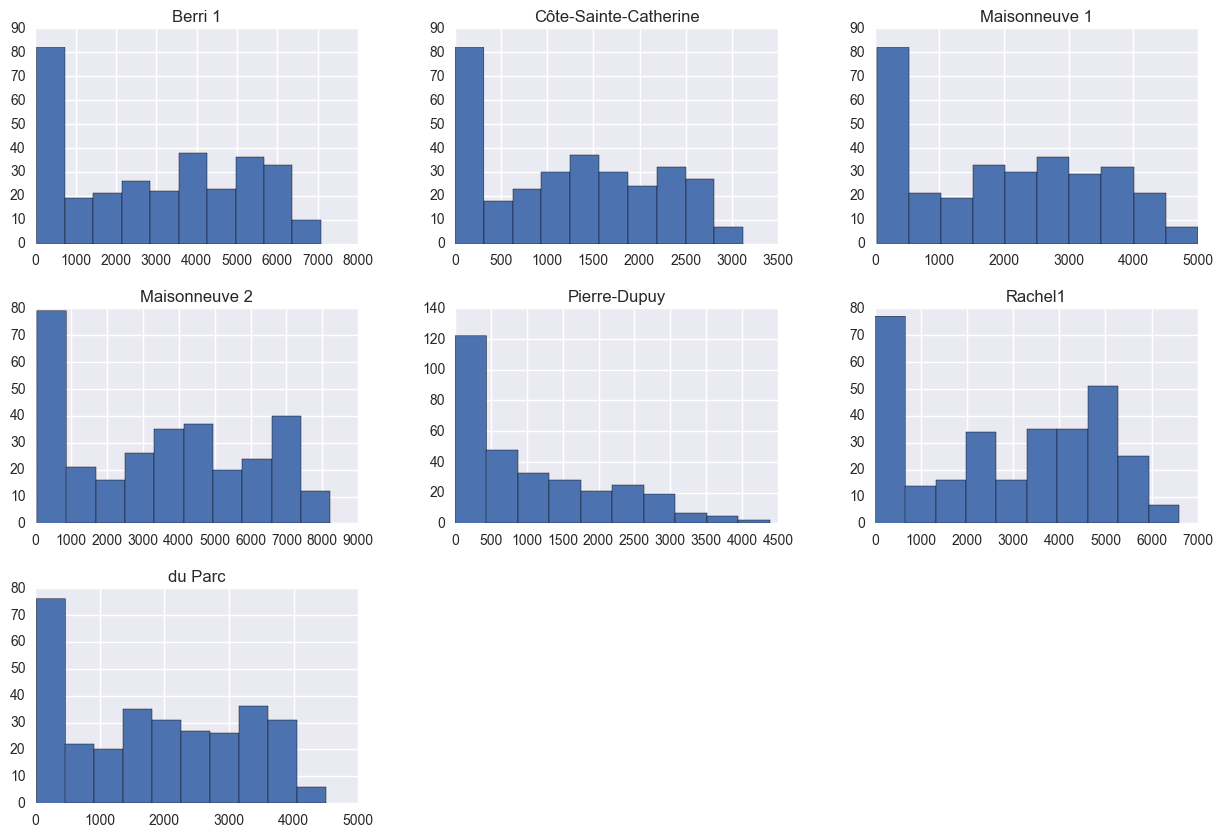

In [41]:
#bikes.hist()   # this command, if you uncomment it, will make plots that are too close togeher.
# this option for the figsize fixes the size issue:
bikes.hist(figsize=(15, 10))

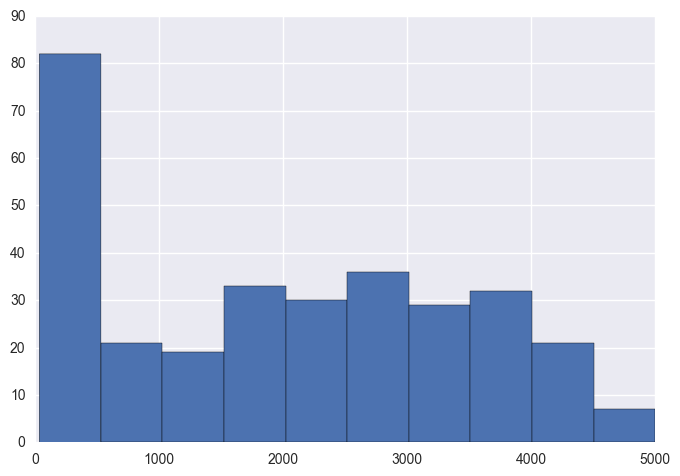

In [59]:
# Just one column's histogram
bikes['Maisonneuve 1'].hist()

## Histogram of a Subset by Value<a name="_histogram of a subset by value"></a>

In [62]:
less_than_500 = bikes['Maisonneuve 1'] < 500

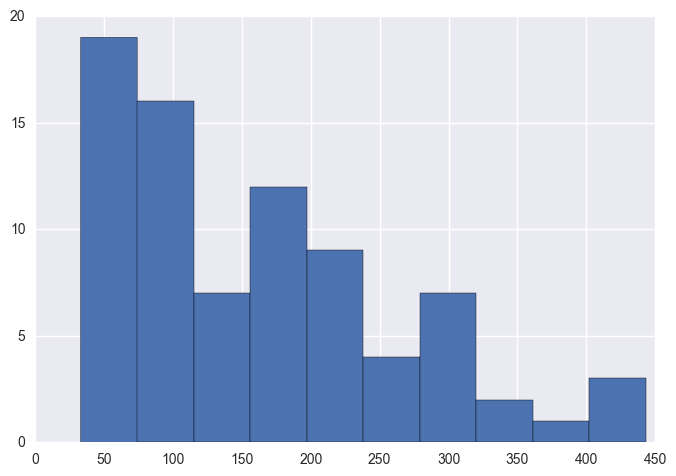

In [65]:
# if we limit the size of the group we plot, we get different bin size:
bikes[less_than_500]['Maisonneuve 1'].hist()

# Sorting By Column<a name="_sorting by column"></a>

In Excel, it's easy to sort by a column and sort the entire table.  In Pandas, we can do it too.

In [162]:
bikes.sort_values(by="Berri 1", ascending=False)

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-06-15,7077,2469,4999,7663,4053,2293,6491
2012-06-14,6908,2978,4809,7934,4223,2386,6243
2012-07-03,6712,2634,4398,7416,3896,2606,5462
2012-07-05,6672,2603,4830,7764,3816,2746,5153
2012-08-22,6529,2671,4513,7065,3774,2391,5154
2012-09-13,6520,3076,4369,7514,4494,1986,5742
2012-07-10,6500,2625,4064,7436,3749,2822,5952
2012-05-24,6485,2653,4600,7600,3792,2062,5209
2012-05-30,6459,2722,4806,7632,3817,2454,5172


In [164]:
# To get the top 10 for Berri 1, then:
bikes.sort_values(by="Berri 1", ascending=False)['Berri 1'][0:10]

Date
2012-06-15    7077
2012-06-14    6908
2012-07-03    6712
2012-07-05    6672
2012-08-22    6529
2012-09-13    6520
2012-07-10    6500
2012-05-24    6485
2012-05-30    6459
2012-07-11    6424
Name: Berri 1, dtype: int64

In [165]:
# notice we didn't alter the sort order of the original data frame when we did this
bikes.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


# Create New Columns<a name="_create new columns"></a>

If you want to add a column based on another column or columns, it's easy. You can add or do simple math by column and just assign to a new column name.

In [135]:
bikes.columns

Index(['Berri 1', 'Côte-Sainte-Catherine', 'Maisonneuve 1', 'Maisonneuve 2',
       'du Parc', 'Pierre-Dupuy', 'Rachel1'],
      dtype='object')

In [42]:
bikes['DailyTotal'] = bikes['Berri 1'] + bikes['Côte-Sainte-Catherine'] + bikes['Maisonneuve 1'] + bikes['Maisonneuve 2']+ bikes['du Parc']+ bikes['Pierre-Dupuy']+ bikes['Rachel1']

In [43]:
bikes['DailyTotal'].head()

Date
2012-01-01    176
2012-01-02    407
2012-01-03    639
2012-01-04    759
2012-01-05    858
Name: DailyTotal, dtype: int64

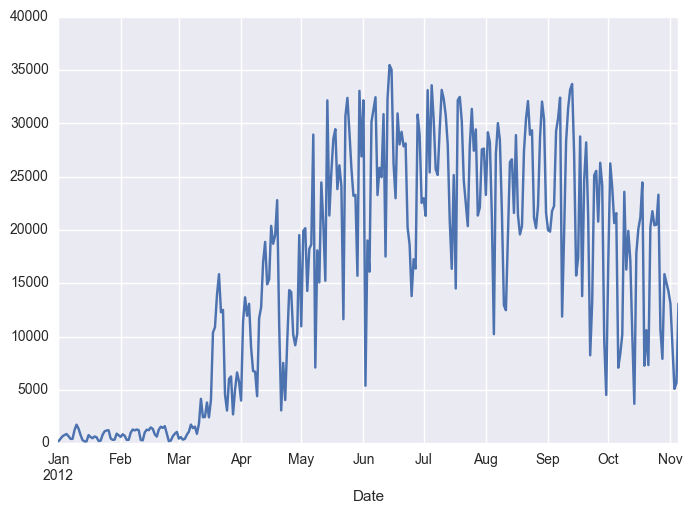

In [44]:
# this plot should match the top of the area plot above... yes, the top is around 35000:
bikes['DailyTotal'].plot()

Now we can do math and plot the result -- what's the percent of total bikes at one stop, over time?

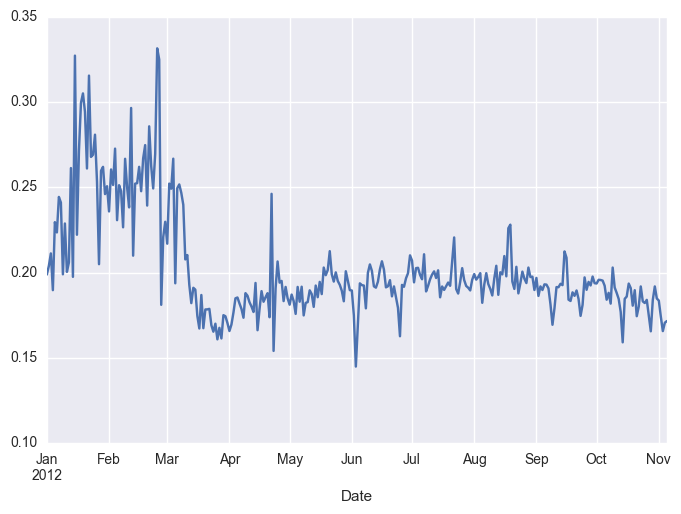

In [45]:
(bikes['Berri 1']/bikes['DailyTotal']).plot()

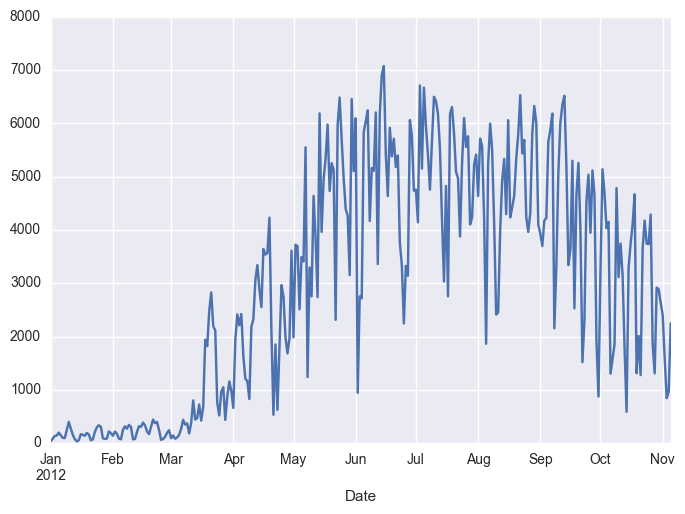

In [83]:
bikes['Berri 1'].plot()

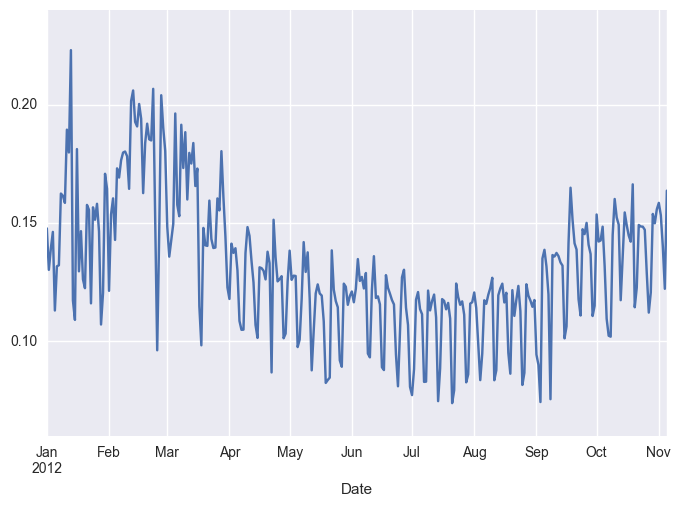

In [82]:
(bikes['du Parc']/bikes['DailyTotal']).plot()

In [46]:
# let's make a copy of it so we don't mess up the original data
proportions = bikes.copy()

In [47]:
proportions['du Parc'] = proportions['du Parc']/bikes['DailyTotal']

In [140]:
proportions['du Parc'].head()

Date
2012-01-01    0.147727
2012-01-02    0.130221
2012-01-03    0.139280
2012-01-04    0.146245
2012-01-05    0.113054
Name: du Parc, dtype: float64

# Applying a Function to Each Column<a name="_applying a function to each column"></a>

You can write use a function to change all the columns or rows... the "axis" value says whether to apply by column (0) or row (1). We are using row, because we want to divide each row by the daily total, so that each row for a location shows the percentage of the daily total. See http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html


In [48]:
# let's reset this, so we can do the calculations more efficiently on all columns.
proportions = bikes.copy()
proportions = proportions.apply(lambda x: x/x['DailyTotal'], axis=1)

In [50]:
proportions

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,DailyTotal
Date,,,,,,,,
2012-01-01,0.198864,0.000000,0.215909,0.289773,0.147727,0.056818,0.090909,1.0
2012-01-02,0.203931,0.002457,0.167076,0.375921,0.130221,0.014742,0.105651,1.0
2012-01-03,0.211268,0.003130,0.162754,0.388106,0.139280,0.004695,0.090767,1.0
2012-01-04,0.189723,0.001318,0.152833,0.418972,0.146245,0.010540,0.080369,1.0
2012-01-05,0.229604,0.002331,0.144522,0.384615,0.113054,0.015152,0.110723,1.0
2012-01-06,0.223583,0.000000,0.150077,0.373660,0.131700,0.006126,0.114855,1.0
2012-01-07,0.244389,0.004988,0.199501,0.269327,0.132170,0.014963,0.134663,1.0
2012-01-08,0.241117,0.002538,0.157360,0.248731,0.162437,0.027919,0.159898,1.0
2012-01-09,0.199021,0.001631,0.134584,0.352365,0.161501,0.009788,0.141109,1.0


In [49]:
proportions.describe()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,DailyTotal
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.0
mean,0.202598,0.061967,0.137288,0.261415,0.131201,0.050806,0.154725,1.0
std,0.031403,0.033897,0.029154,0.072898,0.028787,0.041027,0.078165,0.0
min,0.144908,0.000000,0.076382,0.160440,0.073934,0.000000,0.000000,1.0
25%,0.184931,0.059509,0.120839,0.222358,0.114959,0.016877,0.156755,1.0
50%,0.192982,0.077719,0.131723,0.235068,0.126559,0.043674,0.178146,1.0
75%,0.204622,0.085186,0.144915,0.263131,0.148459,0.074149,0.196695,1.0
max,0.331551,0.102153,0.333333,0.499118,0.222997,0.195062,0.271908,1.0


In [51]:
del proportions['DailyTotal']

/Users/cherny/miniconda3/lib/python3.5/site-packages/pandas/tools/plotting.py:983: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


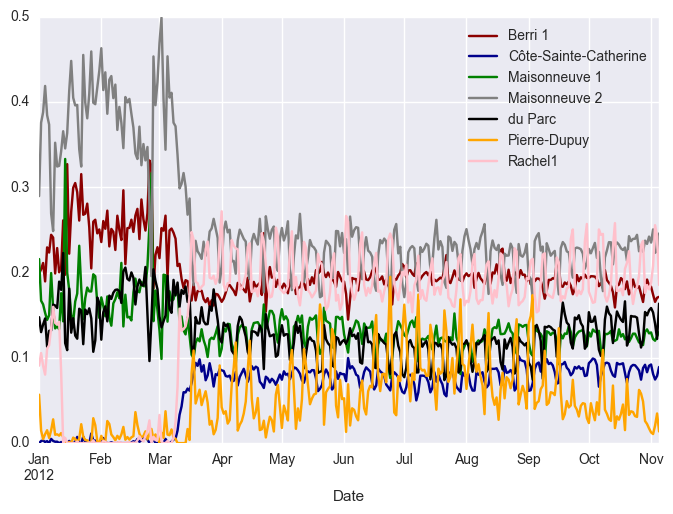

In [52]:
# i customized the colors to make sure they don't overlap
proportions.plot(colors=['darkred','darkblue','green','gray','black','orange','pink'])

/Users/cherny/miniconda3/lib/python3.5/site-packages/pandas/tools/plotting.py:983: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


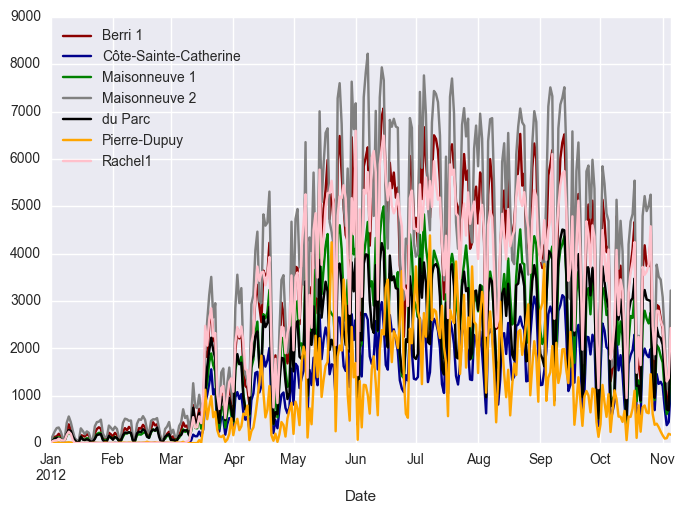

In [53]:
# let's compare the percentage plot to the plot of them all together as totals -- make
# a backup of the Daily Total and then delete it from the df, so it's not plotted.
DailyTotal = bikes['DailyTotal']
del bikes['DailyTotal']
bikes.plot(colors=['darkred','darkblue','green','gray','black','orange','pink'])

## Sort by the new columns to get Highest Proportion<a name="_sort by the new columns to get highest proportion"></a>

In [54]:
# Notice we get different dates when we find when Berri 1 has the highest proportion, rather than the highest number of 
# bikes total
proportions.sort_values(by='Berri 1', ascending=False)

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-02-25,0.331551,0.000000,0.256684,0.278075,0.096257,0.010695,0.026738
2012-01-15,0.327273,0.000000,0.200000,0.363636,0.109091,0.000000,0.000000
2012-02-26,0.325000,0.000000,0.316667,0.195833,0.145833,0.016667,0.000000
2012-01-22,0.315556,0.000000,0.182222,0.324444,0.155556,0.022222,0.000000
2012-01-19,0.305112,0.001597,0.166134,0.396166,0.126198,0.004792,0.000000
2012-01-18,0.299569,0.000000,0.142241,0.405172,0.146552,0.006466,0.000000
2012-02-12,0.296578,0.000000,0.136882,0.346008,0.201521,0.019011,0.000000
2012-01-20,0.294333,0.007313,0.175503,0.396709,0.122486,0.001828,0.001828
2012-02-21,0.285807,0.003240,0.189242,0.325988,0.185353,0.006481,0.003889
